In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
aids_clinical_trials_group_study_175 = fetch_ucirepo(id=890) 
  
# data (as pandas dataframes) 
X = aids_clinical_trials_group_study_175.data.features 
y = aids_clinical_trials_group_study_175.data.targets 
  
# metadata 
# print(aids_clinical_trials_group_study_175.metadata) 
  
# variable information 
print(aids_clinical_trials_group_study_175.variables) 

       name     role        type         demographic  \
0    pidnum       ID     Integer                None   
1       cid   Target      Binary                None   
2      time  Feature     Integer                None   
3       trt  Feature     Integer                None   
4       age  Feature     Integer                 Age   
5      wtkg  Feature  Continuous                None   
6      hemo  Feature      Binary                None   
7      homo  Feature      Binary  Sexual Orientation   
8     drugs  Feature      Binary                None   
9    karnof  Feature     Integer                None   
10   oprior  Feature      Binary                None   
11      z30  Feature      Binary                None   
12   zprior  Feature      Binary                None   
13  preanti  Feature     Integer                None   
14     race  Feature     Integer                Race   
15   gender  Feature      Binary              Gender   
16     str2  Feature      Binary                

In [196]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
pd.set_option('display.max_columns', None)
from sklearn.model_selection import train_test_split
from typing import Any, List, Dict, Tuple
from sklearn.metrics import f1_score, accuracy_score

In [3]:
X.head()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,zprior,preanti,race,gender,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820
0,948,2,48,89.8128,0,0,0,100,0,0,1,0,0,0,0,1,0,1,0,422,477,566,324
1,1002,3,61,49.4424,0,0,0,90,0,1,1,895,0,0,1,3,0,1,0,162,218,392,564
2,961,3,45,88.4520,0,1,1,90,0,1,1,707,0,1,1,3,0,1,1,326,274,2063,1893
3,1166,3,47,85.2768,0,1,0,100,0,1,1,1399,0,1,1,3,0,1,0,287,394,1590,966
4,1090,0,43,66.6792,0,1,0,100,0,1,1,1352,0,1,1,3,0,0,0,504,353,870,782


In [5]:
y = y.squeeze()

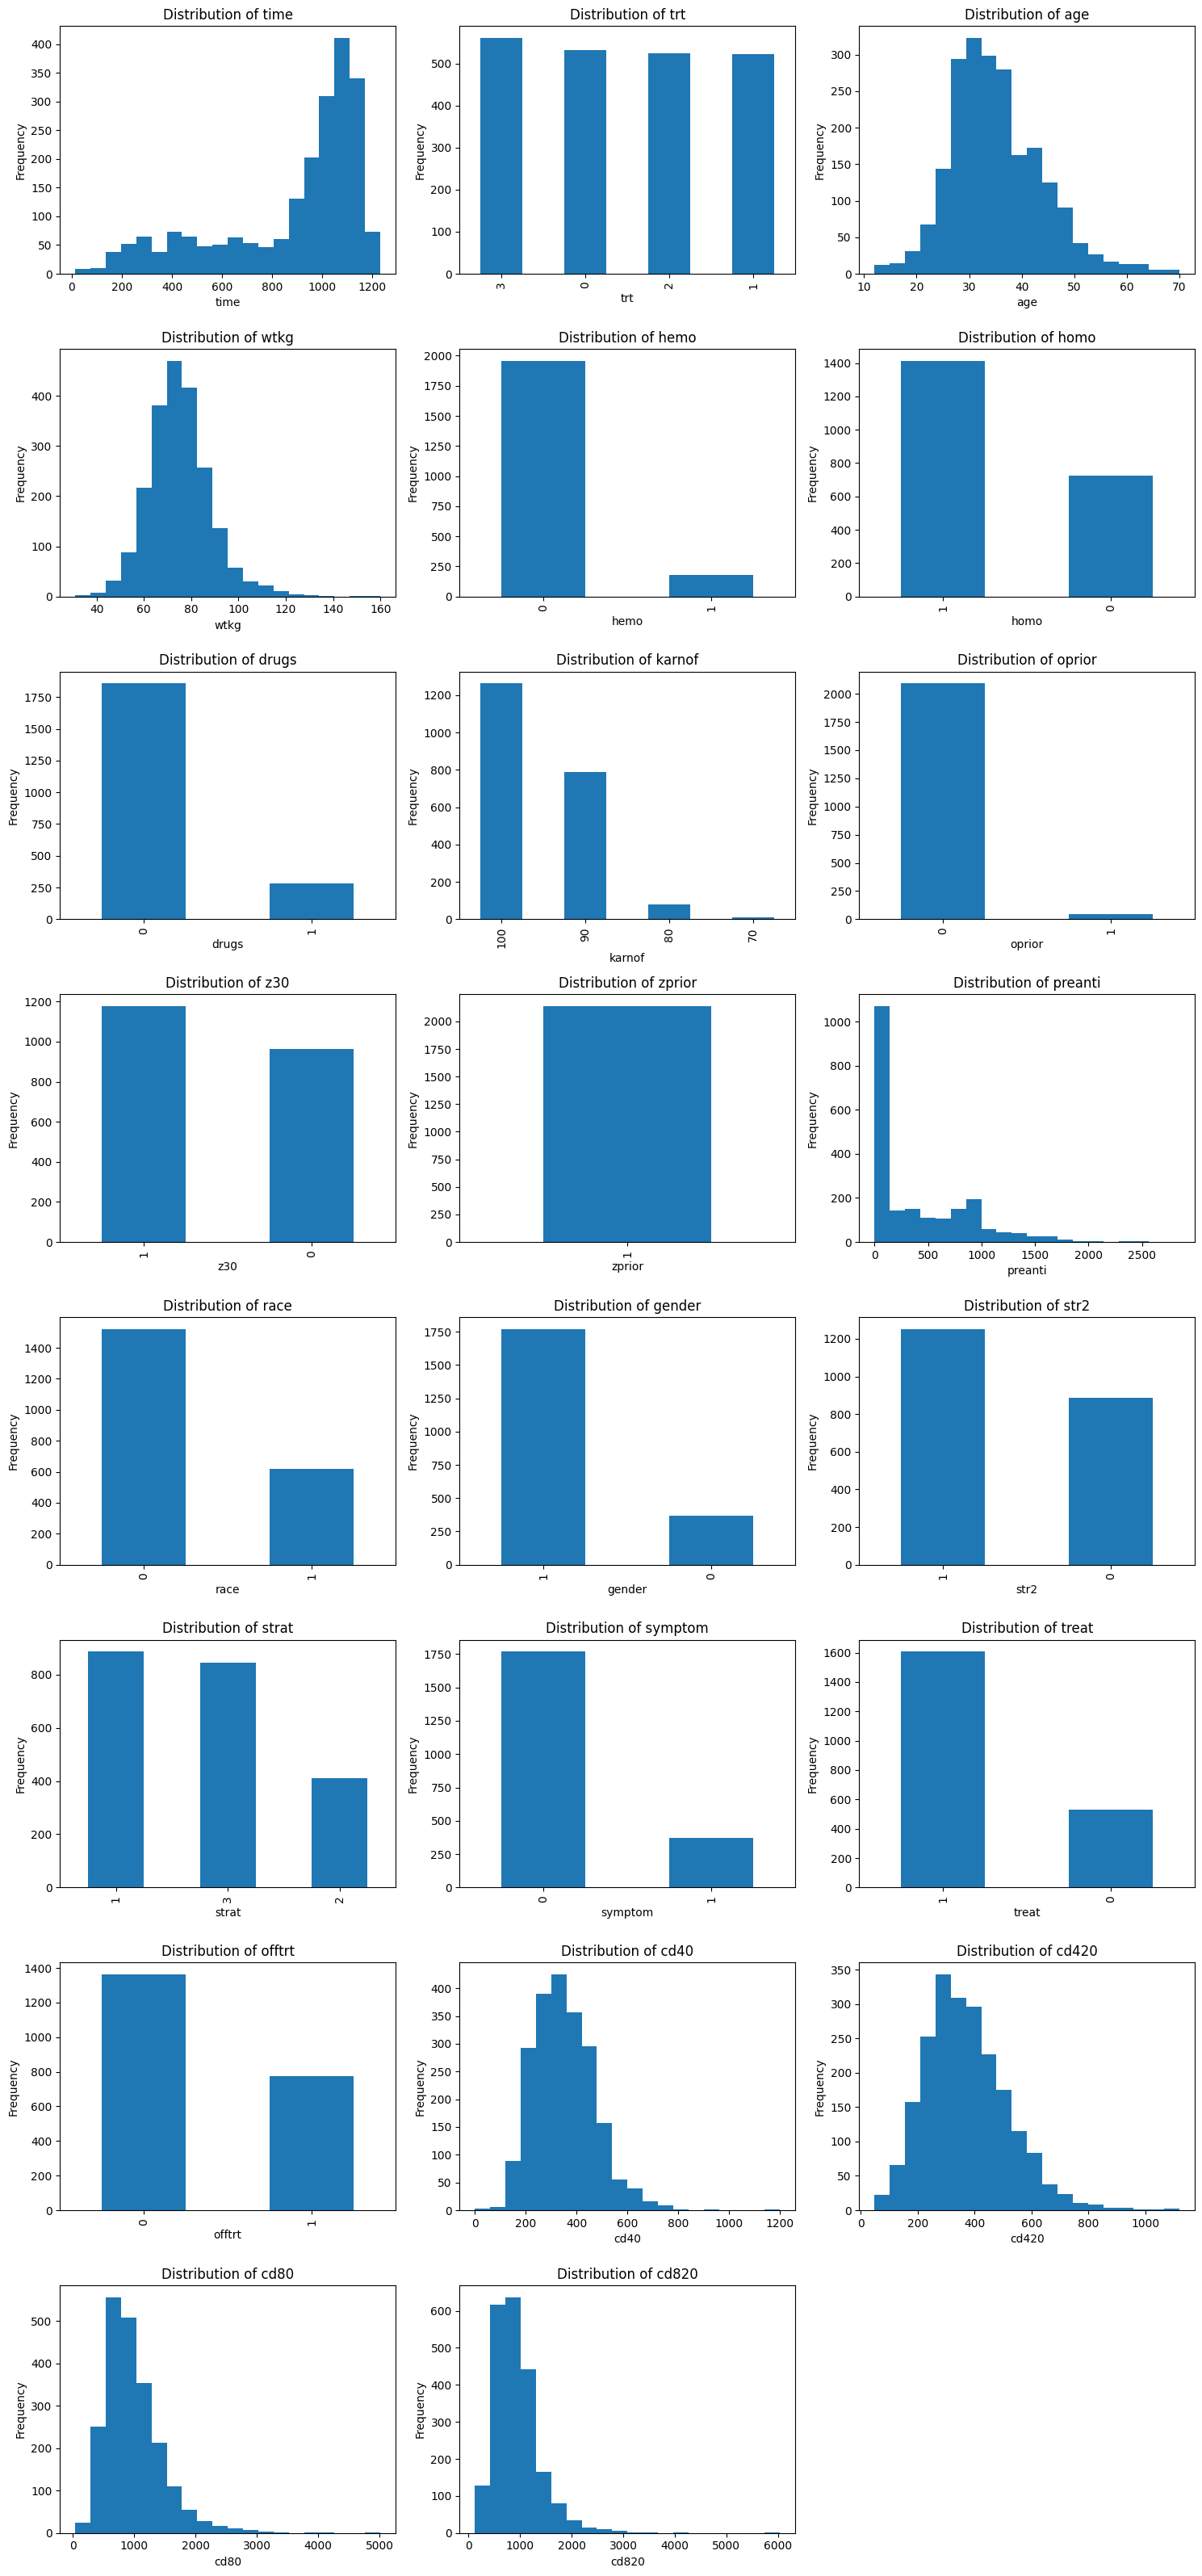

In [6]:
num_columns = len(X.columns)
cols = 3  # Number of columns in the grid (adjust as needed)
rows = math.ceil(num_columns / cols)

# Create a grid of subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))  # Adjust figure size as needed
axes = axes.flatten()  # Flatten to easily iterate over axes

for i, column in enumerate(X.columns):
    ax = axes[i]
    if X[column].dtype == 'object' or len(X[column].unique()) < 20:
        # For categorical or discrete features, use a bar plot
        X[column].value_counts().plot(kind='bar', ax=ax)
        ax.set_title(f'Distribution of {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Frequency')
    else:
        # For continuous features, use a histogram
        X[column].plot(kind='hist', bins=20, ax=ax)
        ax.set_title(f'Distribution of {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Frequency')

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Adjust layout for readability
plt.show()

In [7]:
y.value_counts()

cid
0    1618
1     521
Name: count, dtype: int64

In [8]:
y.value_counts() / len(y)

cid
0    0.756428
1    0.243572
Name: count, dtype: float64

/tmp/ipykernel_6710/1737992026.py:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=X, x=X.columns[i-1],
/tmp/ipykernel_6710/1737992026.py:13: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=X, x=X.columns[i-1],


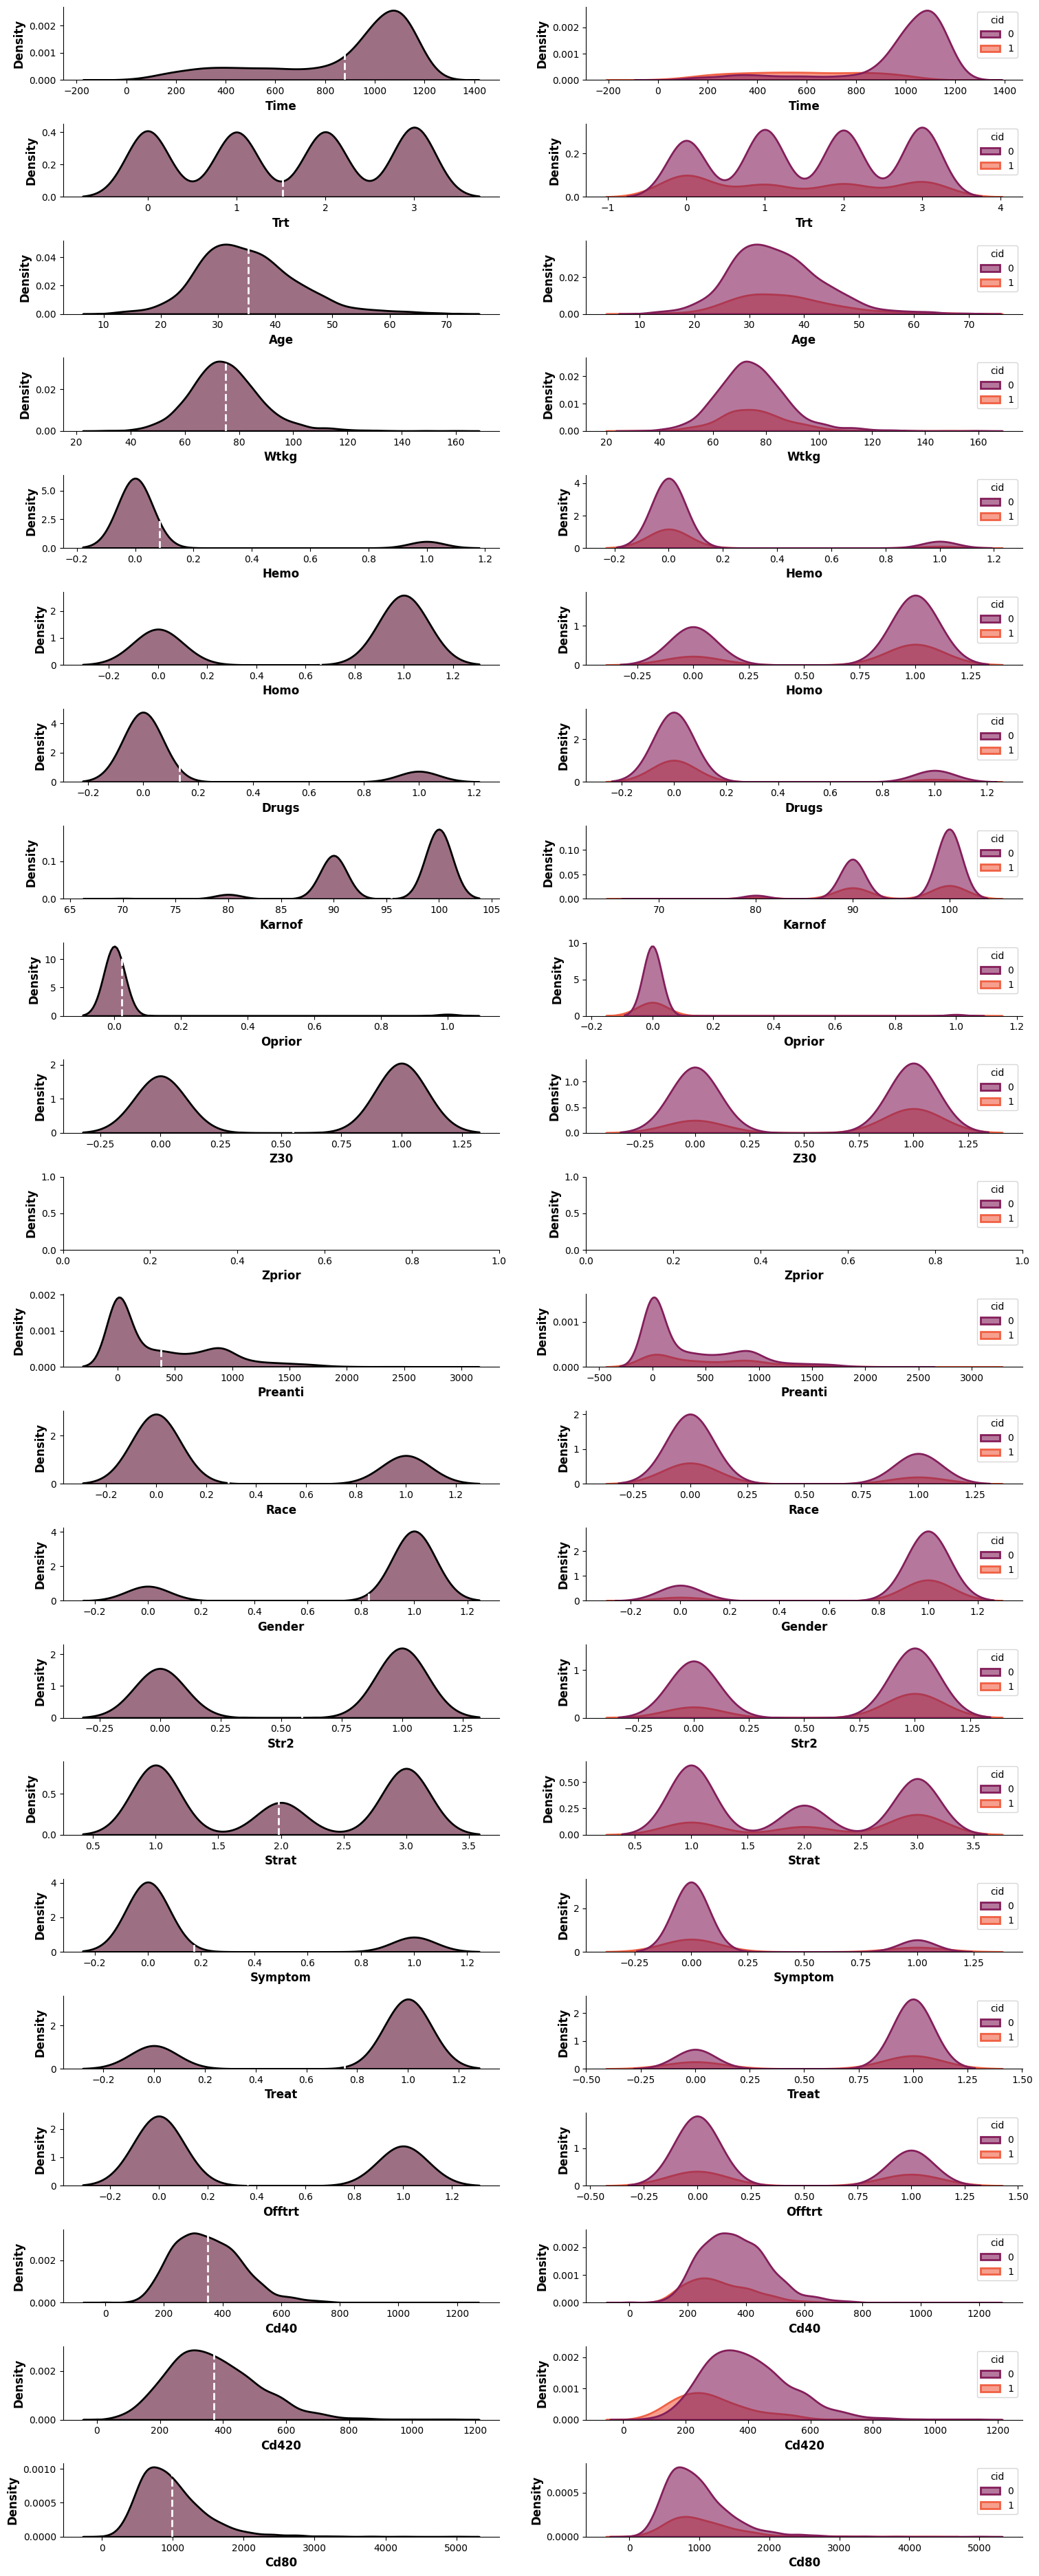

In [9]:

plotIndex = 1
plt.figure(figsize=(18,50))
for i in range(1, len(X.columns)):
    plt.subplot(len(X.columns), 2, plotIndex)
    sns.kdeplot(data=X, x=X.columns[i-1], 
                fill=True, linewidth=2, color='#5c1031', alpha=0.6, edgecolor='k')
    plt.axvline(X[X.columns[i-1]].mean(), color='white', linestyle='--', linewidth=2)
    plt.xlabel(xlabel=X.columns[i-1].title(), fontsize=12, weight='bold')
    plt.ylabel(ylabel='Density', fontsize=12, weight='bold')
    sns.despine()

    plt.subplot(len(X.columns), 2, plotIndex+1)
    sns.kdeplot(data=X, x=X.columns[i-1], 
                fill=True, hue=y, linewidth=2, palette='rocket', alpha=0.6)
    plt.xlabel(xlabel=X.columns[i-1].title(), fontsize=12, weight='bold')
    plt.ylabel(ylabel='Density', fontsize=12, weight='bold')
    sns.despine()

    
    plotIndex += 2
plt.subplots_adjust(hspace=0.6)    
plt.show()

/home/toretto/miniconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/toretto/miniconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


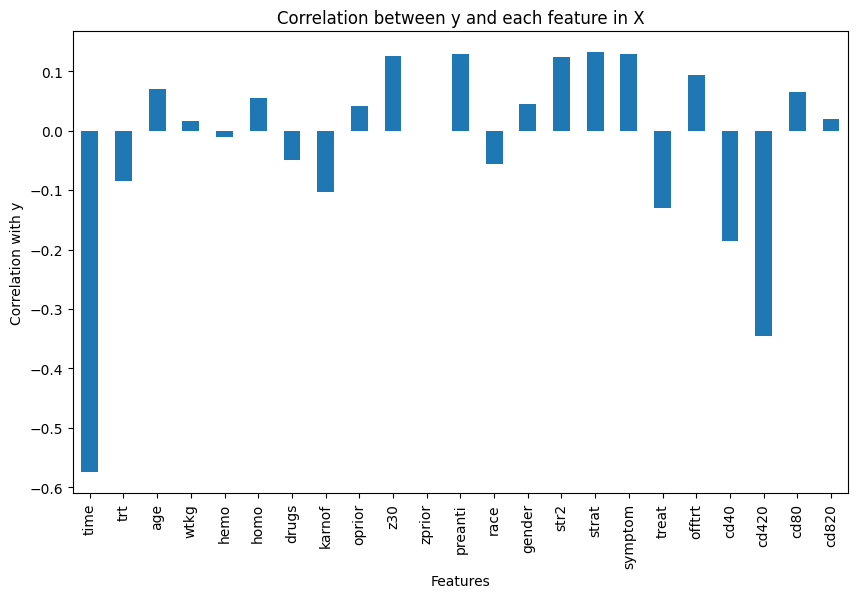

In [10]:
correlations = X.corrwith(y)
correlations.plot(kind='bar', figsize=(10, 6))
plt.title('Correlation between y and each feature in X')
plt.xlabel('Features')
plt.ylabel('Correlation with y')
plt.show()

In [11]:
X['time'][y == 1].min(), X['time'][y == 1].max()

(14, 1073)

In [12]:
X['time'][y == 0].min(), X['time'][y == 0].max()

(62, 1231)

In [13]:
len(X[X['time'] < 1073]), len(X[X['time'] > 1073])

(1445, 689)

# Data Preprocessing

In [14]:
# Remove all partients who dropped out (censored) before 1073 days
condition = (y == 0) & (X['time'] < 1073)
X = X[~condition]
y = y[~condition]

In [15]:
# Remove columns: time, zprior
X = X.drop(['time', 'zprior'], axis='columns')

In [16]:
X

,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,preanti,race,gender,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820
1,3,61,49.4424,0,0,0,90,0,1,895,0,0,1,3,0,1,0,162,218,392,564
3,3,47,85.2768,0,1,0,100,0,1,1399,0,1,1,3,0,1,0,287,394,1590,966
4,0,43,66.6792,0,1,0,100,0,1,1352,0,1,1,3,0,0,0,504,353,870,782
5,1,46,88.9056,0,1,1,100,0,1,1181,0,1,1,3,0,1,0,235,339,860,1060
6,0,31,73.0296,0,1,0,100,0,1,930,0,1,1,3,0,0,0,244,225,708,699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2130,2,25,78.0000,1,0,0,100,0,1,905,0,1,1,3,0,1,0,468,594,636,554
2133,2,39,64.8648,1,0,0,90,0,1,1042,0,1,1,3,0,1,1,378,401,504,367
2134,3,21,53.2980,1,0,0,100,0,1,842,0,1,1,3,0,1,1,152,109,561,720
2136,2,53,69.8544,1,1,0,90,0,1,753,1,1,1,3,0,1,0,419,364,1391,1041


In [17]:
# is there duplicated rows?
X.duplicated().sum()

0

# Splitting the data

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

/home/toretto/miniconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/toretto/miniconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


# Scaling (binarization)

In [20]:
X.columns

Index(['trt', 'age', 'wtkg', 'hemo', 'homo', 'drugs', 'karnof', 'oprior',
       'z30', 'preanti', 'race', 'gender', 'str2', 'strat', 'symptom', 'treat',
       'offtrt', 'cd40', 'cd420', 'cd80', 'cd820'],
      dtype='object')

In [21]:
X_binarized = pd.DataFrame(index=X.index)

#### 1. trt

treatment indicator (0 = ZDV only;
                     1 = ZDV + ddI,
                     2 = ZDV + Zal,
                     3 = ddI only)

In [22]:
trt_zdv = X['trt'].isin([0, 1, 2])    # True when 'trt' is 0, 1, or 2
trt_ddi = X['trt'].isin([1, 3])       # True when 'trt' is 1 or 3
trt_zal = X['trt'] == 2               # True when 'trt' is 2

In [23]:
X_binarized['trt_zdv'] = trt_zdv
X_binarized['trt_ddi'] = trt_ddi
X_binarized['trt_zal'] = trt_zal

#### 2. age

In [25]:
min_age = X_train['age'].min()
max_age = X_train['age'].max()
min_age, max_age

(12, 70)

12 - 20 - 40 - 60 - 70

In [26]:
thresholds = [min_age, 20, 40, 60, max_age]

In [27]:
for threshold in thresholds:
    X_binarized[f'age_le_{threshold}'] = X['age'] <= threshold
    X_binarized[f'age_ge_{threshold}'] = X['age'] >= threshold

#### 3. wtkg

In [30]:
min_wt = X_train['wtkg'].min()
max_wt = X_train['wtkg'].max()
min_wt, max_wt

(31.0, 129.0)

In [31]:
thresholds = [min_wt, 40, 60, 80, 100, max_wt]

In [32]:
for threshold in thresholds:
    X_binarized[f'wt_le_{threshold}'] = X['wtkg'] <= threshold
    X_binarized[f'wt_ge_{threshold}'] = X['wtkg'] >= threshold

#### 4. hemo

Hemophilia is a rare, genetic blood disorder that happens when your blood doesn't clot and make your bleeding slow down or stop.
Гемофилия

In [35]:
X_binarized['hemo'] = X['hemo'] == 1

#### 5. homo

In [37]:
X_binarized['homo'] = X['homo'] == 1

#### 6. drugs

In [38]:
X_binarized['drugs'] = X['drugs'] == 1
X_binarized['not_drugs'] = X['drugs'] == 0

#### 7. karnof

The Karnofsky score (or Karnofsky Performance Status Scale) is a standardized measure used in medicine to evaluate a patient's overall functional status and ability to perform daily activities.

100: Normal, no complaints, no signs of disease.
90: Able to carry on normal activity with minor symptoms.
80: Normal activity with some effort; some symptoms of disease.
70: Cares for self but unable to carry on normal activity or do active work.
60: Requires occasional assistance but is able to care for most needs.
50: Requires considerable assistance and frequent medical care.
40: Disabled, requires special care and assistance.
30: Severely disabled; hospitalization indicated, though death is not imminent.
20: Very sick; hospitalization necessary; active supportive treatment needed.
10: Moribund, fatal processes progressing rapidly.
0: Dead.

In [41]:
min_karnof = X_train['karnof'].min()
max_karnof = X_train['karnof'].max()
min_karnof, max_karnof

(70, 100)

In [42]:
X_train['karnof'].value_counts()

karnof
100    566
90     356
80      45
70       4
Name: count, dtype: int64

In [43]:
thresholds = [70, 80, 90, 100]

In [44]:
for threshold in thresholds:
    X_binarized[f'karnof_le_{threshold}'] = X['karnof'] <= threshold
    X_binarized[f'kanrof_ge_{threshold}'] = X['karnof'] >= threshold

#### 8. oprior

In [ ]:
Non-ZDV Antiretroviral Therapy Pre-175 (oprior): Binary indicator of non-ZDV antiretroviral therapy pre-Study 175 (0 = no, 1 = yes).

In [45]:
X_binarized['oprior'] = X['oprior'] == 1
X_binarized['not_oprior'] = X['oprior'] == 0

#### 9. z30

In [ ]:
ZDV in the 30 Days Prior to 175 (z30): Binary indicator of ZDV use in the 30 days prior to Study 175 (0 = no, 1 = yes).

In [46]:
X_binarized['z30'] = X['z30'] == 1
X_binarized['not_z30'] = X['z30'] == 0

#### 10. preanti

In [ ]:
Days Pre-175 Anti-Retroviral Therapy (preanti): Integer representing the number of days of pre-Study 175 anti-retroviral therapy.

In [47]:
X_train['preanti'].min(), X_train['preanti'].max()

(0, 2500)

In [63]:
(
len(X_train[X_train['preanti'] == 0]),
len(X_train[X_train['preanti'] <= 200]),
len(X_train[X_train['preanti'] <= 500]),
len(X_train[X_train['preanti'] <= 1000]),
len(X_train[X_train['preanti'] >= 1000])
 
)

(287, 419, 576, 850, 122)

In [64]:
thresholds = [0, 200, 500, 1000]

In [65]:
for threshold in thresholds:
    X_binarized[f'preanti_le_{threshold}'] = X['preanti'] <= threshold
    X_binarized[f'preanti_ge_{threshold}'] = X['preanti'] >= threshold

#### 11. race


In [68]:
X_binarized['white'] = X['race'] == 0
X_binarized['not_white'] = X['race'] == 1

#### 12. gender

In [71]:
X_binarized['male'] = X['gender'] == 1
X_binarized['female'] = X['gender'] == 0

#### 13. str2

Antiretroviral History (str2): Binary indicator of antiretroviral history (0 = naive, 1 = experienced).

In [74]:
X_binarized['str2'] = X['str2'] == 1
X_binarized['not_str2'] = X['str2'] == 0

#### 14. strat

Antiretroviral History Stratification (strat): Integer representing antiretroviral history stratification.

In [75]:
X_train['strat'].value_counts()

strat
3    475
1    292
2    204
Name: count, dtype: int64

In [76]:
thresholds = [1, 2, 3]

In [77]:
for threshold in thresholds:
    X_binarized[f'strat_le_{threshold}'] = X['strat'] <= threshold
    X_binarized[f'strat_ge_{threshold}'] = X['strat'] >= threshold

#### 15. symptom

symptomatic indicator (0=asymp, 1=symp)

In [78]:
X_binarized['symptom'] = X['symptom'] == 1

#### 16. treat

treatment indicator (0=ZDV only, 1=others) ???

In [79]:
X['treat'].value_counts()

treat
1    891
0    323
Name: count, dtype: int64

In [80]:
X['trt'].value_counts()

trt
0    323
3    305
1    296
2    290
Name: count, dtype: int64

#### 17. offtrt

Off-Treatment Indicator (offtrt): Binary indicator of being off-treatment before 96+/-5 weeks (0 = no, 1 = yes).

The Off-Treatment Indicator (offtrt) specifically refers to whether a patient went off treatment within the study period, before reaching 96 weeks (plus or minus a 5-week margin) from the study's start. Here’s a clarification:

0 (no): The patient remained on treatment continuously for at least 96 weeks (within a margin of 5 weeks).
1 (yes): The patient stopped treatment early, meaning they went off treatment before reaching the 96-week timepoint (or within a margin of 5 weeks before or after).

In [83]:
X_train['offtrt'].value_counts()

offtrt
0    729
1    242
Name: count, dtype: int64

In [84]:
X_binarized['offtrt'] = X['offtrt'] == 1
X_binarized['not_offtrt'] = X['offtrt'] == 0

#### 18. cd40

CD4 Counts (cd40, cd420): Integer values representing CD4 counts at baseline and 20+/-5 weeks.

CD4 and CD8 counts refer to the levels of specific types of white blood cells, known as T-cells, that play a key role in the immune system. These counts are particularly important in managing and monitoring HIV/AIDS and other immune-related conditions.

#### CD4 Count

CD4 cells (also known as CD4+ T-cells or helper T-cells) are a type of white blood cell that helps coordinate the immune response by signaling other immune cells, like CD8 cells and B cells, to respond to infections.
    
Normal Range: A healthy CD4 count typically ranges from 500 to 1,500 cells per cubic millimeter (cells/mm³) of blood.
Importance in HIV: HIV primarily attacks and destroys CD4 cells, weakening the immune system. In people living with HIV, a low CD4 count (especially below 200 cells/mm³) indicates advanced disease and a high risk of opportunistic infections. Monitoring CD4 count helps assess immune system health and determine treatment effectiveness.

#### CD8 Count

CD8 cells (also known as CD8+ T-cells or cytotoxic T-cells) are another type of white blood cell that directly attacks and destroys infected or cancerous cells.
    
Normal Range: The typical CD8 count ranges from 150 to 1,000 cells/mm³, but this can vary.

Role in HIV: CD8 cells can target and kill cells infected with viruses like HIV. In people with HIV, CD8 cells help control the infection, although they cannot eliminate it entirely. Monitoring CD8 count, along with CD4 count, can provide insights into how the body is responding to the virus and whether the immune system is compensating for CD4 loss.

#### CD4/CD8 Ratio

The CD4/CD8 ratio (calculated by dividing CD4 count by CD8 count) is another important marker of immune health. In healthy individuals, this ratio is usually around 1.0 to 2.0. In HIV patients, a ratio below 1.0 suggests immune system imbalance and can indicate disease progression.

In [86]:
X_train['cd40'].min(), X_train['cd40'].max()

(0, 834)

In [88]:
len(X_train[X_train['cd40'] <= 200]), len(X_train[X_train['cd40'] > 200])

(88, 883)

In [96]:
len(X_train[X_train['cd40'] > 500]), len(X_train[X_train['cd40'] > 600])

(71, 17)

In [98]:
thresholds = [200, 300, 400, 500, 600]

In [99]:
for threshold in thresholds:
    X_binarized[f'cd40_le_{threshold}'] = X['cd40'] <= threshold
    X_binarized[f'cd40_ge_{threshold}'] = X['cd40'] >= threshold

#### 19. cd420

In [100]:
X_train['cd420'].min(), X_train['cd420'].max()

(49, 1040)

In [101]:
len(X_train[X_train['cd420'] <= 200]), len(X_train[X_train['cd420'] > 200])

(88, 883)

In [103]:
len(X_train[X_train['cd420'] > 500]), len(X_train[X_train['cd420'] > 600])

(146, 53)

In [104]:
thresholds = [200, 300, 400, 500, 600]

In [105]:
for threshold in thresholds:
    X_binarized[f'cd420_le_{threshold}'] = X['cd420'] <= threshold
    X_binarized[f'cd420_ge_{threshold}'] = X['cd420'] >= threshold

#### 20. cd80

CD8 Counts (cd80, cd820): Integer values representing CD8 counts at baseline and 20+/-5 weeks.

Early HIV Infection:

    In the early stages of HIV infection, CD8 count often increases. This is because the immune system activates CD8 cells to fight the virus, leading to a temporary spike in CD8 cell numbers.
    CD8 cells attempt to control the virus by targeting and destroying HIV-infected cells.

Chronic HIV Infection:

    As HIV progresses, the immune system becomes more dysregulated. Although CD8 cells remain active, their function begins to decline due to the persistent immune activation and inflammation caused by ongoing HIV replication.
    Over time, CD8 cells become exhausted and less effective at controlling the virus.

Advanced HIV/AIDS:

    In later stages, when CD4 counts are severely depleted, CD8 counts can also decline as the immune system becomes overwhelmed. The loss of CD4 cells (which help activate and coordinate CD8 cells) further weakens CD8 function.
    The balance between CD4 and CD8 cells, reflected in a low CD4/CD8 ratio, indicates a severely compromised immune system, leaving the body more vulnerable to infections and other complications.

In [106]:
X_train['cd80'].min(), X_train['cd80'].max()

(40, 5011)

In [108]:
len(X_train[X_train['cd80'] <= 150]), len(X_train[X_train['cd80'] > 150])

(2, 969)

In [111]:
len(X_train[X_train['cd80'] > 1000]), len(X_train[X_train['cd80'] > 2000]), len(X_train[X_train['cd80'] > 3000])

(424, 43, 7)

In [112]:
thresholds = [150, 1000, 2000, 3000]

In [113]:
for threshold in thresholds:
    X_binarized[f'cd80_le_{threshold}'] = X['cd80'] <= threshold
    X_binarized[f'cd80_ge_{threshold}'] = X['cd80'] >= threshold

#### 21. cd820

In [114]:
X_train['cd820'].min(), X_train['cd820'].max()

(124, 6035)

In [115]:
len(X_train[X_train['cd820'] <= 150]), len(X_train[X_train['cd820'] > 150])

(3, 968)

In [116]:
len(X_train[X_train['cd820'] > 1000]), len(X_train[X_train['cd820'] > 2000]), len(X_train[X_train['cd820'] > 3000])

(371, 31, 6)

In [117]:
thresholds = [150, 1000, 2000, 3000]

In [118]:
for threshold in thresholds:
    X_binarized[f'cd80_le_{threshold}'] = X['cd820'] <= threshold
    X_binarized[f'cd80_ge_{threshold}'] = X['cd820'] >= threshold

# Binarization is Complete, Re-split:

In [119]:
X_binarized.shape

(1214, 92)

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X_binarized, y, test_size=0.2, stratify=y, random_state=42)

/home/toretto/miniconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/toretto/miniconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


# Lazy FCA baseline:

In [188]:
class LazyClassifierFCA:
    def __init__(self):
        self.X_train = None
        self.y_train = None

    def fit(self, X_train: pd.DataFrame, y_train: pd.Series) -> None:
        self.X_train = X_train
        self.y_train = y_train
        
    def classify_sample(self, sample: pd.Series) -> Any:
        # Split X_train into positive and negative classes
        X_train_positive = self.X_train[y_train == 1]
        X_train_negative = self.X_train[y_train == 0]
        
        positive_classifiers = 0
        negative_classifiers = 0
        
        # Function to check if intersection with a train sample is a positive classifier
        def is_positive_classifier(intersection):
            # Find samples in X_train_positive that contain the intersection
            num_positive = ((X_train_positive | ~intersection) == True).all(axis=1).sum()
            num_negative = ((X_train_negative | ~intersection) == True).all(axis=1).sum()
            return num_negative == 0 and num_positive > 1
        
        # Function to check if intersection is a negative classifier
        def is_negative_classifier(intersection):
            # Find samples in X_train_negative that contain the intersection
            num_positive = ((X_train_positive | ~intersection) == True).all(axis=1).sum()
            num_negative = ((X_train_negative | ~intersection) == True).all(axis=1).sum()
            return num_positive == 0 and num_negative > 1
        
        # Check for positive classifiers by intersecting sample with each positive object
        for _, pos_sample in X_train_positive.iterrows():
            intersection = sample & pos_sample
            if is_positive_classifier(intersection):
                positive_classifiers += 1

        # Check for negative classifiers by intersecting sample with each negative object
        for _, neg_sample in X_train_negative.iterrows():
            intersection = sample & neg_sample
            if is_negative_classifier(intersection):
                negative_classifiers += 1

        # Determine the class based on the number of classifiers
        if positive_classifiers > negative_classifiers:
            print(f"sample {sample.name} is classified as 1, {positive_classifiers=}, {negative_classifiers=}")
            return 1  # Predict positive
            
        elif negative_classifiers > positive_classifiers:
            print(f"sample {sample.name} is classified as 0, {positive_classifiers=}, {negative_classifiers=}")
            return 0  # Predict negative

        else:
            # If equal, you can decide on a rule, like defaulting to 0 or 1, or returning 'undetermined'
            print(f"sample {sample.name} is classified as 1, default, {positive_classifiers=}, {negative_classifiers=}")
        
            return 1  # or 0, depending on the choice


    def predict(self, X_test: pd.DataFrame) -> List[Any]:
        # List to store predictions for each test sample
        predictions = []
        
        # Iterate through each sample in X_test
        for _, sample in X_test.iterrows():
            # Classify the sample and append the result to predictions
            prediction = self.classify_sample(sample)
            predictions.append(prediction)
        
        return predictions

In [189]:
sample = X_test.iloc[1]
y.iloc[1]

0

In [190]:
len(X_train[y_train == 1]), len(X_train[y_train == 0])

(417, 554)

In [191]:
pos_X_train = X_train[y_train == 1]
neg_X_train = X_train[y_train == 0]
len(pos_X_train), len(neg_X_train)

(417, 554)

In [192]:
classifier = LazyClassifierFCA()
classifier.fit(X_train, y_train)

In [193]:
classifier.classify_sample(sample)

sample 35 is classified as 0, positive_classifiers=78, negative_classifiers=90


0

In [194]:
y_pred = classifier.predict(X_test)

sample 152 is classified as 0, positive_classifiers=12, negative_classifiers=26
sample 35 is classified as 0, positive_classifiers=78, negative_classifiers=90
sample 1304 is classified as 1, positive_classifiers=73, negative_classifiers=56
sample 1140 is classified as 1, positive_classifiers=132, negative_classifiers=13
sample 738 is classified as 0, positive_classifiers=3, negative_classifiers=175
sample 1020 is classified as 1, positive_classifiers=129, negative_classifiers=19
sample 1075 is classified as 0, positive_classifiers=33, negative_classifiers=43
sample 1582 is classified as 1, positive_classifiers=34, negative_classifiers=33
sample 819 is classified as 0, positive_classifiers=15, negative_classifiers=140
sample 354 is classified as 1, positive_classifiers=55, negative_classifiers=5
sample 134 is classified as 0, positive_classifiers=2, negative_classifiers=132
sample 1118 is classified as 0, positive_classifiers=6, negative_classifiers=144
sample 371 is classified as 1, po

In [199]:
f1_score(y_test, y_pred), accuracy_score(y_test, y_pred)

/home/toretto/miniconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/toretto/miniconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/toretto/miniconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/toretto/miniconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_

(0.5955056179775281, 0.7037037037037037)